In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# Read the data without column names
data = pd.read_csv('/breast-cancer-wisconsin.csv', header=None)

# Define the correct column names
column_names = ['ID', 'gold_standard_diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_std_err', 'texture_std_err', 'perimeter_std_err', 'area_std_err', 'smoothness_std_err', 'compactness_std_err', 'concavity_std_err', 'concave_points_std_err', 'symmetry_std_err', 'fractal_dimension_std_err', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Assign column names to the DataFrame
data.columns = column_names

# Display the data
print(data.head(5))



         ID gold_standard_diagnosis  radius_mean  texture_mean  \
0    842302                       M        17.99         10.38   
1    842517                       M        20.57         17.77   
2  84300903                       M        19.69         21.25   
3  84348301                       M        11.42         20.38   
4  84358402                       M        20.29         14.34   

   perimeter_mean  area_mean  smoothness_mean  compactness_mean  \
0          122.80     1001.0          0.11840           0.27760   
1          132.90     1326.0          0.08474           0.07864   
2          130.00     1203.0          0.10960           0.15990   
3           77.58      386.1          0.14250           0.28390   
4          135.10     1297.0          0.10030           0.13280   

   concavity_mean  concave_points_mean  ...  radius_worst  texture_worst  \
0          0.3001              0.14710  ...         25.38          17.33   
1          0.0869              0.07017  ...     

In [10]:
# Assuming 'data' is your DataFrame
data_shape = data.shape
print("Shape of the DataFrame:", data_shape)

Shape of the DataFrame: (569, 32)


In [11]:
data

,ID,gold_standard_diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
# check if all the values have been remapped
print("Unique values 'gold_standard_diagnosis': {}".format(data['gold_standard_diagnosis'].unique()))

Unique values 'gold_standard_diagnosis': ['M' 'B']


In [13]:
X = data.drop('gold_standard_diagnosis', axis=1)  # Features, excluding 'price_range'
y = data['gold_standard_diagnosis']  # Target variable

### Splitting data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state = 10)

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
# Standardize the feature data

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training And Prediction

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=12)

In [17]:
y_pred = knn.predict(X_test)

### Evaluation The Algorithm|

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75  0]
 [ 2 37]]
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        75
           M       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



#### Comparing Error Rate With K Value

In [19]:
error =[]
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i =knn.predict(X_test)
    error.append(np.mean(pred_i!= y_test))


Text(0, 0.5, 'Mean Error')

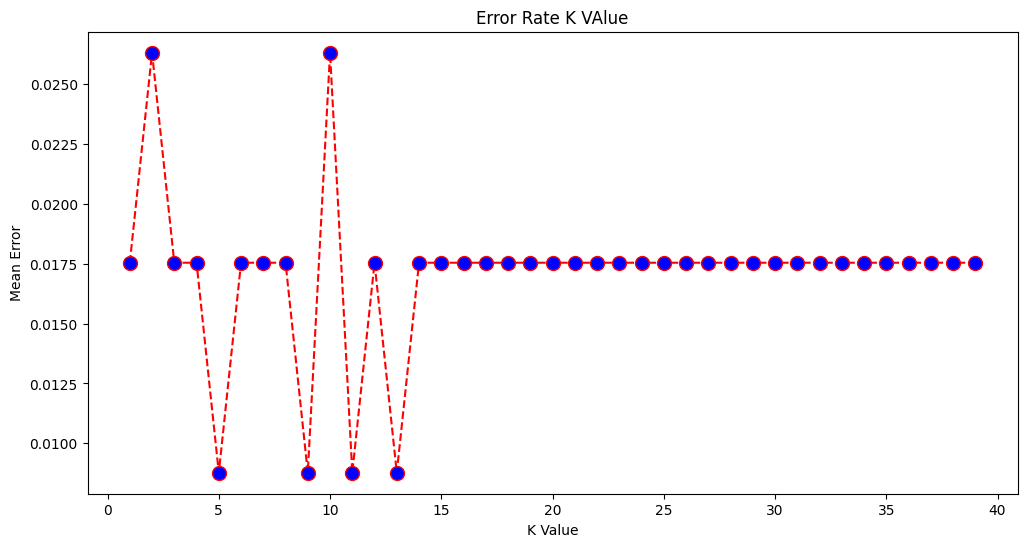

In [20]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error,color='red',linestyle='dashed',marker='o',
     markerfacecolor='blue',markersize=10)
plt.title('Error Rate K VAlue')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Support Vector Machines

### One_Hot_Encoding


In [21]:
data.replace({'gold_standard_diagnosis':{'M':1, 'B':0}}, inplace = True)

In [22]:
new_data = data.copy()
new_data

,ID,gold_standard_diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Select The Predictor Feature And The Target Variable

In [23]:
X = new_data.drop('gold_standard_diagnosis', axis=1)  # Features, excluding 'price_range'
y = new_data['gold_standard_diagnosis']  # Target variable

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state = 10)

#### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
# Standardize the feature data

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Import necessary libraries
from sklearn import svm

# Fit the SVM model
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [27]:
y_pred = model_svm.predict(X_test)

In [28]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.956140350877193


In [29]:
# Calculate precision and recall
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

# Print the results
print("Precision: ", precision)
print("Recall: ", recall)

Precision:  0.925
Recall:  0.9487179487179487


#### Decision Tree


In [30]:
from sklearn import tree, metrics
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [31]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 8
Accuracy: 0.93


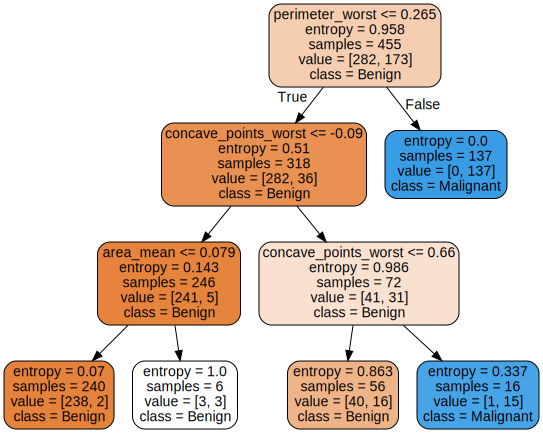

In [33]:
from sklearn.tree import  export_graphviz
import graphviz
from IPython.display import display
# Visualize the decision tree using graphviz
dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True, feature_names=list(X.columns), class_names=['Benign', 'Malignant'])
graph = graphviz.Source(dot_data)

# Display the graph
graph